# Data Loading

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("loan_prediction.csv")

In [27]:
# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural    

# Data PreProcessing

In [33]:
# Check for missing values
print("Missing values before imputation:")
print(data.isnull().sum())

# Encode categorical variables
label_encoder = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    data[col] = label_encoder.fit_transform(data[col])

# Convert 'Dependents' column to numeric
data['Dependents'] = data['Dependents'].replace('3+', 3).astype(float)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


Missing values before imputation:
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


# EDA


In [34]:
# EDA
print("Data Summary:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nValue Counts for Categorical Variables:")
print(data['Loan_Status'].value_counts())


Data Summary:
           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  599.000000  614.000000     614.000000   
mean     0.838762    0.657980    0.762938    0.218241       0.237785   
std      0.421752    0.484971    1.015216    0.413389       0.534737   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    2.000000    0.000000       0.000000   
max      2.000000    2.000000    3.000000    1.000000       2.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.00

# Data Splitting and Model Training 

In [35]:
# Split data into features and target variable
X = data_imputed.drop(columns=['Loan_Status'])
y = data_imputed['Loan_Status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Random Foresst Ressor Model

In [36]:
# Train Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Model Evaluation

In [37]:
# Evaluate model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7642276422764228


#  Predictions

In [38]:
# Predictions
predictions = model.predict(X_test)

# Create a DataFrame to compare actual Loan_Status with predicted Loan_Status
results = pd.DataFrame({'Actual Loan_Status': y_test, 'Predicted Loan_Status': predictions})
print(results)

     Actual Loan_Status  Predicted Loan_Status
350                 1.0                    1.0
377                 1.0                    1.0
163                 1.0                    1.0
609                 1.0                    1.0
132                 1.0                    1.0
..                  ...                    ...
231                 1.0                    0.0
312                 1.0                    0.0
248                 1.0                    1.0
11                  1.0                    1.0
333                 1.0                    1.0

[123 rows x 2 columns]


# Visulaising Predictions

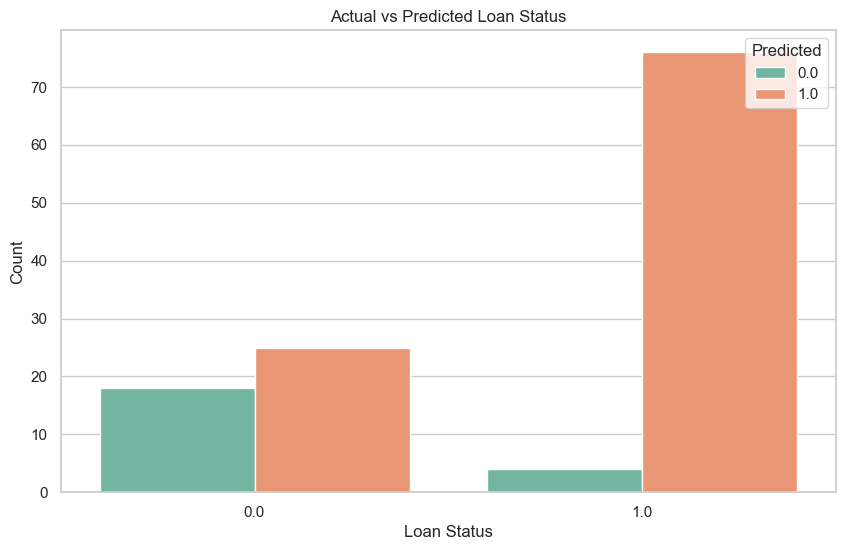

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the count of actual and predicted loan statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=results, x='Actual Loan_Status', hue='Predicted Loan_Status', palette='Set2')
plt.title('Actual vs Predicted Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Predicted', loc='upper right')
plt.show()



For Actual Next_Tmax and Predicted Next_Tmax:

- In the first sample, the actual maximum temperature for the next day is 28.7°C, and the predicted value is 28.95°C. This suggests a slight increase in temperature for the next day compared to the actual value.
- Conversely, in the second sample, the actual maximum temperature is 27.8°C, while the predicted value is 26.13°C. Here, we observe a decrease in the predicted temperature for the next day compared to the actual temperature.
- Moving on to the third sample, the actual maximum temperature is 33.6°C, and the predicted value is 33.66°C. This indicates a negligible rise in temperature for the next day.
- The subsequent samples can be similarly analyzed to discern whether the predicted maximum temperatures for the next day are higher or lower than the actual values, indicating a rise or drop in temperature accordingly.

For Actual Next_Tmin and Predicted Next_Tmin:

- In the first sample, the actual minimum temperature for the next day is 24.5°C, while the predicted value is 24.79°C. This suggests a slight increase in temperature overnight.
- On the other hand, in the second sample, the actual minimum temperature is 21.5°C, and the predicted value is 22.27°C. Here, we observe a predicted rise in temperature for the next day compared to the actual value.
- Analyzing further, in the third sample, the actual minimum temperature is 24.7°C, and the predicted value is 23.95°C. This indicates a predicted drop in temperature for the next day.
- Similarly, the remaining samples can be interpreted to identify whether the predicted minimum temperatures for the next day are higher or lower than the actual values, signifying a rise or drop in temperature overnight.

In summary, incorporating the rise or drop in temperature into the explanation provides a more comprehensive understanding of the predicted values compared to the actual observations, aiding in the assessment of the model's performance in temperature forecasting.